<a href="https://colab.research.google.com/github/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/Notebook_03_Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 02 - Aprendendo com os dados: criando um modelo de previsão de inadimplência - Modelos de Machine Learning

Chegou a hora de criar os modelos de machine learning para classificação, além de usar métricas para testar a eficácia dos mesmos.

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from utils import config_exibicao, config_graficos, treino_teste, classificador, metricas, curva_roc, comp_metricas

Com a função **config_exibicao** iremos configurar a exibição de dataframes pandas, de modo que os mesmos possam exibir o maior número de informações nas células sem cortar conteudo.

E com a função **config_graficos** vamos configurar a exibição dos gráficos.

Mais informações sobre essas funções podem ser vistas no arquivo [utils.py](https://github.com/mavenceslau/Challenge-Data-Science-Alura-Cash/blob/master/notebooks/utils.py)

In [2]:
#config_exibicao()
#config_graficos()

Importando a base de dados e exibindo os primeiros registros

In [3]:
url = '../data/processed/alura_cash_tratado.csv'
dados = pd.read_csv(url)
dados.head()

,pessoa_idade,pessoa_salario_anual,pessoa_status_propriedade,pessoa_tempo_trabalho,emprestimo_motivo,emprestimo_pontuacao,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_inadimplente,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito
0,22,50000.0,Hipotecada,0,Pagamento de débitos,A,12800.0,5.79,0,0.26,N,2.0
1,26,84996.0,Alugada,0,Médico,B,9000.0,11.26,0,0.11,N,2.0
2,24,55782.0,Alugada,3,Melhora do lar,A,17000.0,7.51,0,0.30,N,2.0
3,25,125000.0,Própria,9,Pessoal,B,25000.0,10.59,0,0.20,N,2.0
4,23,44340.0,Própria,0,Empreendimento,C,3000.0,12.98,0,0.07,S,3.0


In [4]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset possui 32316 linhas e 12 colunas


## Aplicando Encoding nas váriaveis

In [5]:
# Feita a alteração, onde o 'N' foi substituido por '0', e 'S' por '1'

for cliente in 'historico_inadimplencia':
    dados['historico_inadimplencia'] = dados['historico_inadimplencia'].replace({'N': 0, 'S': 1})

dados.head(10)

,pessoa_idade,pessoa_salario_anual,pessoa_status_propriedade,pessoa_tempo_trabalho,emprestimo_motivo,emprestimo_pontuacao,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_inadimplente,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito
0,22,50000.0,Hipotecada,0,Pagamento de débitos,A,12800.0,5.79000,0,0.26,0,2.0
1,26,84996.0,Alugada,0,Médico,B,9000.0,11.26000,0,0.11,0,2.0
2,24,55782.0,Alugada,3,Melhora do lar,A,17000.0,7.51000,0,0.30,0,2.0
3,25,125000.0,Própria,9,Pessoal,B,25000.0,10.59000,0,0.20,0,2.0
4,23,44340.0,Própria,0,Empreendimento,C,3000.0,12.98000,0,0.07,1,3.0
5,29,50000.0,Hipotecada,4,Médico,B,21850.0,12.42000,0,0.44,0,10.0
6,27,35000.0,Alugada,8,Pessoal,B,12000.0,9.91000,1,0.34,0,8.0
7,32,19200.0,Alugada,0,Empreendimento,B,5000.0,9.99000,1,0.26,0,6.0
8,22,70800.0,Alugada,6,Educativo,C,10000.0,12.61000,0,0.14,1,2.0
9,22,45000.0,Alugada,1,Empreendimento,E,10000.0,11.01363,1,0.22,0,2.0


In [6]:
categorias = ['pessoa_status_propriedade', 'emprestimo_motivo', 'emprestimo_pontuacao']
dados2 = dados.drop(categorias, axis=1)
dados2.columns

Index(['pessoa_idade', 'pessoa_salario_anual', 'pessoa_tempo_trabalho',
       'emprestimo_valor_total', 'emprestimo_taxa_juros',
       'emprestimo_inadimplente', 'emprestimo_renda_percentual',
       'historico_inadimplencia', 'historico_tempo_credito'],
      dtype='object')

In [7]:
ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(dados[categorias]).toarray()
dados_final = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(categorias))], axis=1)
dados_final.head()

,pessoa_idade,pessoa_salario_anual,pessoa_tempo_trabalho,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_inadimplente,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito,pessoa_status_propriedade_Alugada,...,emprestimo_motivo_Médico,emprestimo_motivo_Pagamento de débitos,emprestimo_motivo_Pessoal,emprestimo_pontuacao_A,emprestimo_pontuacao_B,emprestimo_pontuacao_C,emprestimo_pontuacao_D,emprestimo_pontuacao_E,emprestimo_pontuacao_F,emprestimo_pontuacao_G
0,22,50000.0,0,12800.0,5.79,0,0.26,0,2.0,0,...,0,1,0,1,0,0,0,0,0,0
1,26,84996.0,0,9000.0,11.26,0,0.11,0,2.0,1,...,1,0,0,0,1,0,0,0,0,0
2,24,55782.0,3,17000.0,7.51,0,0.30,0,2.0,1,...,0,0,0,1,0,0,0,0,0,0
3,25,125000.0,9,25000.0,10.59,0,0.20,0,2.0,0,...,0,0,1,0,1,0,0,0,0,0
4,23,44340.0,0,3000.0,12.98,0,0.07,1,3.0,0,...,0,0,0,0,0,1,0,0,0,0


## Verificando se a variável target está balanceada

In [8]:
dados_final.emprestimo_inadimplente.value_counts()

0    25047
1     7269
Name: emprestimo_inadimplente, dtype: int64

In [9]:
print(f'Existem {dados_final.emprestimo_inadimplente.value_counts()[0]} clientes em dia e ' +
      f'{dados_final.emprestimo_inadimplente.value_counts()[1]} clientes inadimplentes. O dataset não está balanceado.')

Existem 25047 clientes em dia e 7269 clientes inadimplentes. O dataset não está balanceado.


Irei utilizar a técnica de balanceamento de dados **oversampling**, que é basicamente duplicar, fazer a cópia dos nossos dados da classe minoritária até chegar no valor da classe majoritária. Então, ela fará cópia dos dados de clientes inadimplentes, ou seja, criaria novos dados até chegarmos ao número de dados dos clientes em dia. Para que não ocorra muitos dados idênticos, será utilizada a técnica SMOTE, que cria dados sintéticos próximos dos reais.

In [10]:
from imblearn.over_sampling import SMOTE

SEED = 25
smote = SMOTE(random_state = SEED)

In [11]:
x = dados_final.drop('emprestimo_inadimplente', axis = 1)
y = dados_final['emprestimo_inadimplente']

In [12]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [13]:
dados_final = pd.concat([y_resampled, x_resampled], axis = 1)
dados_final

,emprestimo_inadimplente,pessoa_idade,pessoa_salario_anual,pessoa_tempo_trabalho,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito,pessoa_status_propriedade_Alugada,...,emprestimo_motivo_Médico,emprestimo_motivo_Pagamento de débitos,emprestimo_motivo_Pessoal,emprestimo_pontuacao_A,emprestimo_pontuacao_B,emprestimo_pontuacao_C,emprestimo_pontuacao_D,emprestimo_pontuacao_E,emprestimo_pontuacao_F,emprestimo_pontuacao_G
0,0,22,50000.000000,0,12800.000000,5.790000,0.260000,0,2.000000,0,...,0,1,0,1,0,0,0,0,0,0
1,0,26,84996.000000,0,9000.000000,11.260000,0.110000,0,2.000000,1,...,1,0,0,0,1,0,0,0,0,0
2,0,24,55782.000000,3,17000.000000,7.510000,0.300000,0,2.000000,1,...,0,0,0,1,0,0,0,0,0,0
3,0,25,125000.000000,9,25000.000000,10.590000,0.200000,0,2.000000,0,...,0,0,1,0,1,0,0,0,0,0
4,0,23,44340.000000,0,3000.000000,12.980000,0.070000,1,3.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50089,1,26,16108.869916,2,5000.000000,12.031696,0.310000,0,3.371003,1,...,0,0,0,0,0,0,0,0,0,0
50090,1,25,39000.000000,4,19981.760589,14.441603,0.510000,0,2.875492,1,...,0,0,0,0,0,0,0,0,0,0
50091,1,30,66739.856964,6,13128.019714,15.484263,0.200235,0,4.536918,0,...,0,0,0,0,0,0,0,0,0,0
50092,1,22,18713.497684,1,4068.445427,15.103237,0.213422,0,4.000000,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
print(f'Existem {dados_final.emprestimo_inadimplente.value_counts()[0]} clientes em dia e ' +
      f'{dados_final.emprestimo_inadimplente.value_counts()[1]} clientes inadimplentes. O dataset está balanceado.')

Existem 25047 clientes em dia e 25047 clientes inadimplentes. O dataset está balanceado.


## Criando modelos de Machine Learning

Primeiro iremos fazer a normalização dos dados, pois no dataset existe dados em diferentes escalas de valor, como por exemplo a idade e salário anual. Como o salário está numa escala maior que a idade, os modelos de machine learning podem levar isso em consideração nos resultados.

Para essa atividade será utilizado o **StandardScaler** do pacote sklearn. O que ele faz com os dados é usar a diferença do valor e a média divididos pelo valor do desvio padrão:

**valor = (valor — média) / desvioPadão**

Depois desse processo teremos dados com desvio padrão e variância igual a 1.

In [15]:
colunas = dados_final.columns

In [16]:
from sklearn.preprocessing import StandardScaler

# cria o objeto obj_std
obj_std = StandardScaler().fit(dados_final)

# aplica o padronizador nos dados
dados_std = obj_std.transform(dados_final)

dados_std

array([[-1.        , -0.91886286, -0.15629138, ..., -0.15266981,
        -0.07320205, -0.03793899],
       [-1.        , -0.22545145,  1.15292992, ..., -0.15266981,
        -0.07320205, -0.03793899],
       [-1.        , -0.57215715,  0.0600167 , ..., -0.15266981,
        -0.07320205, -0.03793899],
       ...,
       [ 1.        ,  0.46795996,  0.46995668, ..., -0.15266981,
        -0.07320205, -0.03793899],
       [ 1.        , -0.91886286, -1.32673816, ..., -0.15266981,
        -0.07320205, -0.03793899],
       [ 1.        , -0.0520986 , -0.53039737, ..., -0.15266981,
        -0.07320205, -0.03793899]])

In [17]:
dados_final = pd.DataFrame(dados_std, columns = colunas)

In [18]:
dados_final

,emprestimo_inadimplente,pessoa_idade,pessoa_salario_anual,pessoa_tempo_trabalho,emprestimo_valor_total,emprestimo_taxa_juros,emprestimo_renda_percentual,historico_inadimplencia,historico_tempo_credito,pessoa_status_propriedade_Alugada,...,emprestimo_motivo_Médico,emprestimo_motivo_Pagamento de débitos,emprestimo_motivo_Pessoal,emprestimo_pontuacao_A,emprestimo_pontuacao_B,emprestimo_pontuacao_C,emprestimo_pontuacao_D,emprestimo_pontuacao_E,emprestimo_pontuacao_F,emprestimo_pontuacao_G
0,-1.0,-0.918863,-0.156291,-1.179778,0.471773,-1.913908,0.495085,-0.416688,-0.966051,-1.085095,...,-0.404003,2.720701,-0.363904,1.816262,-0.546794,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
1,-1.0,-0.225451,1.152930,-1.179778,-0.120875,-0.129922,-0.752391,-0.416688,-0.966051,0.921578,...,2.475229,-0.367552,-0.363904,-0.550581,1.828843,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
2,-1.0,-0.572157,0.060017,-0.354004,1.126805,-1.352947,0.827746,-0.416688,-0.966051,0.921578,...,-0.404003,-0.367552,-0.363904,1.816262,-0.546794,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
3,-1.0,-0.398804,2.649503,1.297543,2.374484,-0.348436,-0.003905,-0.416688,-0.966051,-1.085095,...,-0.404003,-0.367552,2.747978,-0.550581,1.828843,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
4,-1.0,-0.745510,-0.368035,-1.179778,-1.056634,0.431039,-1.085052,2.399877,-0.702529,-1.085095,...,-0.404003,-0.367552,-0.363904,-0.550581,-0.546794,2.441591,-0.353946,-0.15267,-0.073202,-0.037939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50089,1.0,-0.225451,-1.424179,-0.629262,-0.744714,0.121759,0.910911,-0.416688,-0.604761,0.921578,...,-0.404003,-0.367552,-0.363904,-0.550581,-0.546794,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
50090,1.0,-0.398804,-0.567808,-0.078746,1.591840,0.907726,2.574213,-0.416688,-0.735339,0.921578,...,-0.404003,-0.367552,-0.363904,-0.550581,-0.546794,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
50091,1.0,0.467960,0.469957,0.471769,0.522931,1.247780,-0.001953,-0.416688,-0.297516,-1.085095,...,-0.404003,-0.367552,-0.363904,-0.550581,-0.546794,-0.409569,-0.353946,-0.15267,-0.073202,-0.037939
50092,1.0,-0.918863,-1.326738,-0.904520,-0.890000,1.123512,0.107721,-0.416688,-0.439006,-1.085095,...,-0.404003,-0.367552,-0.363904,-0.550581,-0.546794,-0.409569,2.825287,-0.15267,-0.073202,-0.037939


In [19]:
dados_final.describe().T

,count,mean,std,min,25%,50%,75%,max
emprestimo_inadimplente,50094.0,0.000000e+00,1.00001,-1.000000,-1.000000,0.000000,1.000000,1.000000
pessoa_idade,50094.0,1.320737e-15,1.00001,-1.265569,-0.745510,-0.225451,0.294607,11.562542
pessoa_salario_anual,50094.0,1.748919e-15,1.00001,-1.877179,-0.754969,-0.156291,0.591921,3.158288
pessoa_tempo_trabalho,50094.0,4.902833e-15,1.00001,-1.179778,-0.629262,-0.078746,0.471769,6.802702
emprestimo_valor_total,50094.0,-1.852455e-16,1.00001,-1.446534,-0.744714,-0.245643,0.502965,3.934084
emprestimo_taxa_juros,50094.0,3.249767e-16,1.00001,-2.034579,-0.620653,-0.056344,0.734715,3.770713
emprestimo_renda_percentual,50094.0,-5.949722e-15,1.00001,-1.584042,-0.825997,-0.171037,0.661415,5.235496
historico_inadimplencia,50094.0,-3.958825e-15,1.00001,-0.416688,-0.416688,-0.416688,-0.416688,2.399877
historico_tempo_credito,50094.0,-6.639463e-16,1.00001,-0.966051,-0.702529,-0.439006,0.582728,6.412589
pessoa_status_propriedade_Alugada,50094.0,7.938199e-15,1.00001,-1.085095,-1.085095,0.921578,0.921578,0.921578


## Regressão Logistica

In [20]:
# Separação do dataset em variável dependente(y) e variáveis explicativas(x)

SEED = 25
x = dados_final.drop('emprestimo_inadimplente', axis = 1)
y = dados_final['emprestimo_inadimplente']

In [21]:
# Separação de dados de treino e teste

treino_x, teste_x, treino_y, teste_y = treino_teste(x, y, SEED)
print(f'A base de treino possui {treino_x.shape[0]} registros e a base e testes possui {teste_x.shape[0]} registros')

A base de treino possui 37570 registros e a base e testes possui 12524 registros


In [22]:
#treino e previsão

rl = LogisticRegression(max_iter = 1000, random_state = SEED)
y_predito_rl = classificador(rl, treino_x, teste_x, treino_y)

Acurácia: 0.9
Precisão: 0.94
Recall: 0.86
F1: 0.9


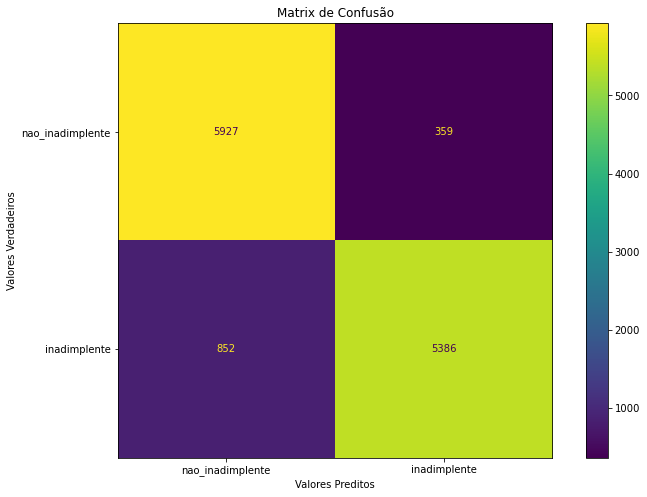

In [23]:
#Metricas

labels = ['nao_inadimplente', 'inadimplente']

metricas(y_predito_rl, teste_y, labels)

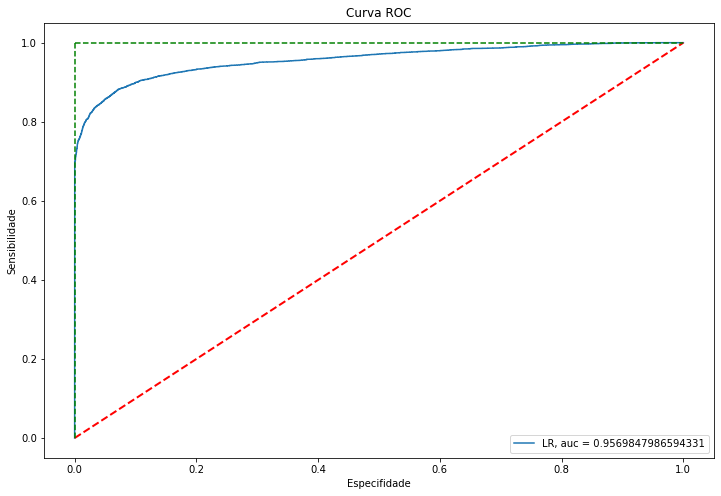

In [24]:
curva_roc(rl ,teste_x, teste_y)

### Métricas para os modelos

**As métricas que serão usadas nos modelos:**

**Matrix de Confusão**: Uma forma simples de avaliar nossos modelos. No exemplo da Regressão Logística temos:

* `Elemento na posição (0,0)` = Representa os valores **Verdadeiros Negativos**, mostra a quantidade de vezes que o modelo acertou que cliente realmente não era inadimplente (5927).

* `Elemento na posição (0,1)` = Representa os valores **Falsos Positivo**, ou seja, a quantidade de vezes que o modelo previu incorretamente um resultado como positivo. Mostra a quantidade de vezes que o modelo disse que o cliente era inadimplente, mas na verdade não era inadimplente (359).

* `Elemento na posição (1,0)` = Representa os valores **Falsos Negativos**, ou seja, a quantidade de vezes que o modelo previu incorretamnte um resultado como negativo. Mostra a quantidade de vezes que o modelo disse que o cliente não era inadimplente, mas na verdade era inadimplente (852).

* `Elemento na posição (1,1)` =  Representa os valores **Verdadeiros Positivos**, ou seja, a quantidade de vezes que o modelo previu que um cliente realmente era inadimplente (5386).

**Acurácia**: Avalia o percentual de acertos do modelo. Caso haja 100 observações e o modelo acerte 90, a acurácia será de 90%.

**Precisão**: É a razão entre os resultados verdadeiros positivos sobre a soma das previsões positivas. 

**Recall**: Também conhecida por sensibilidade, o recall avalia a proporção de verdadeiros positivos.

**F1**: É o equilibrio entre precisão e o recall.

**Curva ROC**: A curva ROC avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

A sensibilidade indica a taxa de casos em que a categoria alvo, ou seja, a categoria 1, foi classificada corretamente.

Já a especificidade mede a taxa em que a categoria 0 foi, de maneira errada, classificada como 1.

**AUC**: Também conhecida como Área sobre a curva, essa métrica varia de 0 a 1 e quanto maior o seu valor, melhor será avaliado o modelo. 

## Árvore de Decisão

In [25]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = SEED)
y_predito_dt = classificador(dt, treino_x, teste_x, treino_y)

Acurácia: 0.85
Precisão: 0.83
Recall: 0.88
F1: 0.85


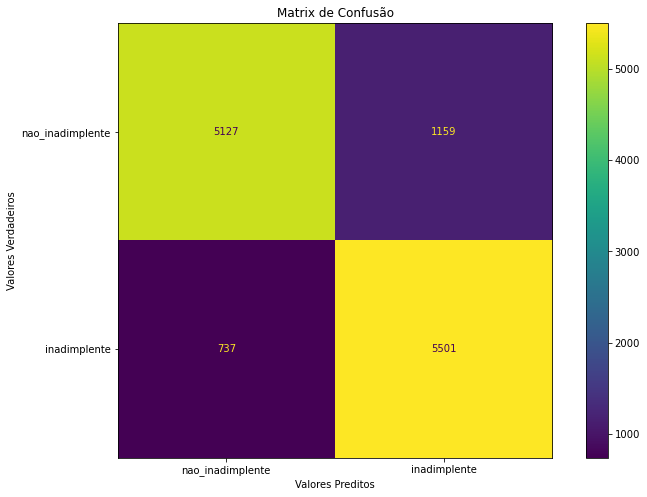

In [26]:
metricas(y_predito_dt, teste_y, labels)

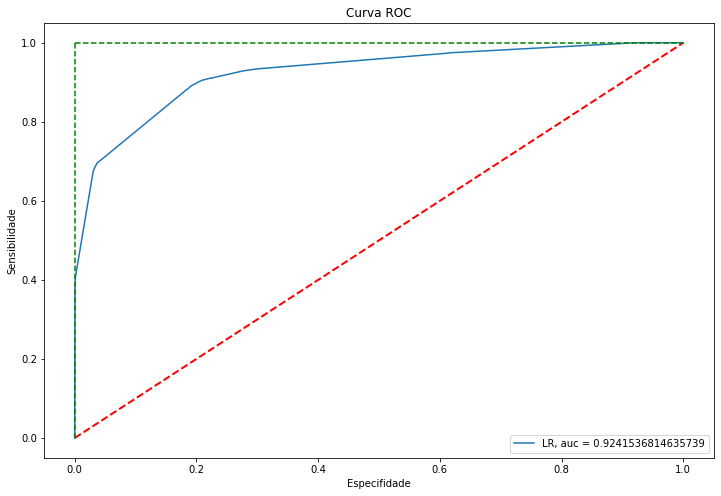

In [27]:
curva_roc(dt ,teste_x, teste_y)

## Random Forest

Acurácia: 0.9
Precisão: 0.92
Recall: 0.88
F1: 0.9


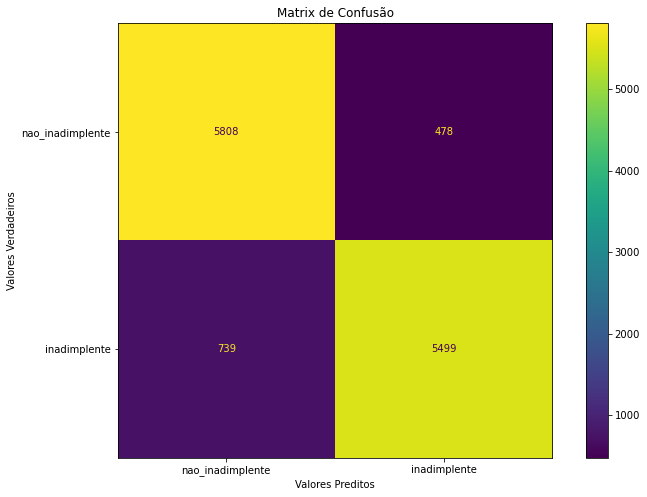

In [28]:
rf = RandomForestClassifier(max_depth = 5, random_state = SEED)
y_predito_rf = classificador(rf, treino_x, teste_x, treino_y)
metricas(y_predito_rf, teste_y, labels)

## Comparação de Metricas dos modelos

LogisticRegression

****Resultados****
Acurácia: 0.9
Precisão: 0.94
Recall: 0.86
F1: 0.9

RandomForestClassifier

****Resultados****
Acurácia: 0.9
Precisão: 0.92
Recall: 0.88
F1: 0.9

DecisionTreeClassifier

****Resultados****
Acurácia: 0.85
Precisão: 0.83
Recall: 0.88
F1: 0.85



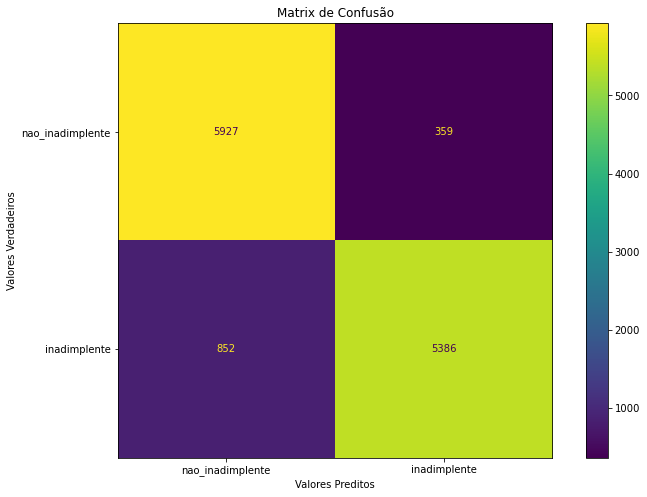

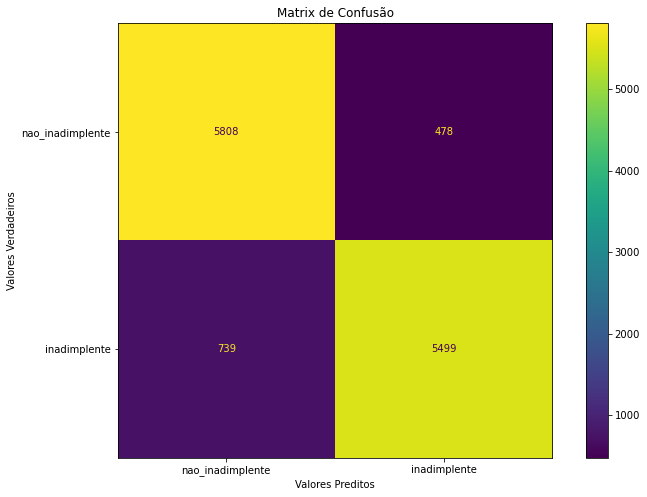

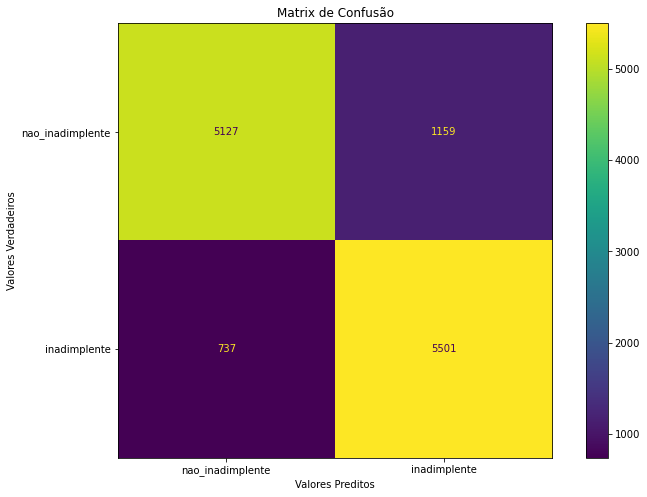

In [29]:
classificadores = [
    LogisticRegression(max_iter = 1000, random_state = SEED),
    RandomForestClassifier(max_depth = 5, random_state = SEED),
    DecisionTreeClassifier(max_depth = 5, random_state = SEED)
]

comp_metricas(classificadores, x, y, SEED, labels)

## Melhoria do modelo

Como foi visto anteriormente, o recall do modelo que utiliza a Randon Forest obteve o a melhor pontuação. Essa que mede a proporção entre os Verdadeiros positivos, ou seja, a quantidade de resultados positivos que o modelo acertou. Para melhorar o modelo será utilizada o método RandomizedSearchCV.

In [30]:
n_estimators = np.arange(20, 1000, step = 20)
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']
max_depth = list(np.arange(2, 1000, step = 1))
min_samples_split = np.arange(2, 1000, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [31]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

rforest = RandomForestClassifier(random_state = SEED)

In [33]:
random_cv = RandomizedSearchCV(rforest, param_grid, n_iter = 5, cv = 3, scoring = 'recall', n_jobs = -1, random_state = SEED)

In [34]:
%%time
rcv = random_cv.fit(x, y)

CPU times: total: 35 s
Wall time: 2min 50s


In [35]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,66.344986,4.735213,3.037595,0.016208,760,536,2,log2,524,entropy,False,"{'n_estimators': 760, 'min_samples_split': 536...",0.596718,0.963948,0.963109,0.841258,0.172916,3
1,1.440364,0.060793,0.100156,0.001220,20,446,2,log2,414,gini,False,"{'n_estimators': 20, 'min_samples_split': 446,...",0.583423,0.965026,0.963588,0.837346,0.179551,4
2,40.138521,2.086872,2.594149,0.026858,720,736,2,sqrt,846,gini,True,"{'n_estimators': 720, 'min_samples_split': 736...",0.597197,0.956282,0.957360,0.836947,0.169529,5
3,37.954935,2.077560,1.628402,0.279860,380,80,2,sqrt,899,gini,False,"{'n_estimators': 380, 'min_samples_split': 80,...",0.629057,0.976165,0.976644,0.860622,0.163741,1
4,10.354187,1.877199,0.418428,0.040054,120,732,2,sqrt,444,entropy,False,"{'n_estimators': 120, 'min_samples_split': 732...",0.608336,0.963109,0.958917,0.843454,0.166262,2


In [36]:
rcv.best_params_

{'n_estimators': 380,
 'min_samples_split': 80,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 899,
 'criterion': 'gini',
 'bootstrap': False}

In [37]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(treino_x, treino_y)
y_pred = rfn.predict(teste_x)

Acurácia: 0.94
Precisão: 0.98
Recall: 0.9
F1: 0.94


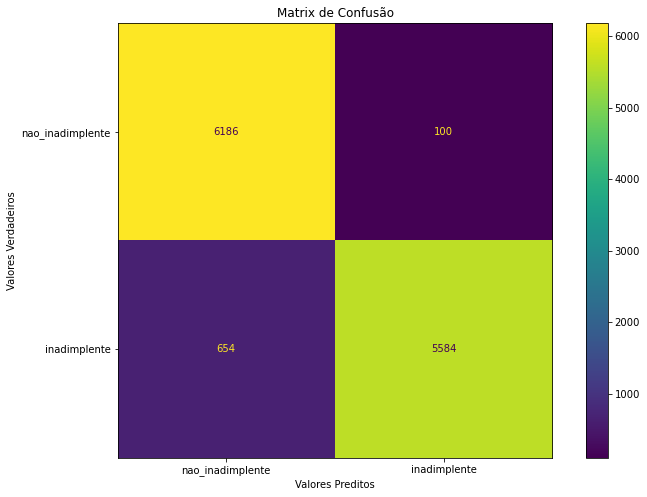

In [38]:
metricas(y_pred, teste_y, labels)

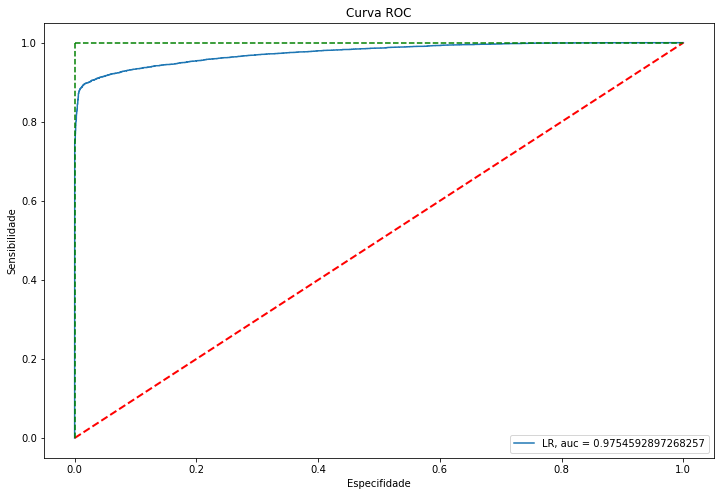

In [39]:
curva_roc(rfn, teste_x, teste_y)

As melhorias no modelo foram focadas no recall, assim a quantidade de verdadeiros positivos, que no nosso modelo é a quantidade de clientes inadimplentes.

## Salvando modelo estimado

In [40]:
import pickle

In [41]:
#output = open('../models/modelo_classificacao_inadimplencia', 'wb')
#pickle.dump(model, output)
#output.close()